# Support Vector Machine and Supervised Learning Models

1. Dividing dataset for training and testing
- train_test_split(arrays, options).
- Options
    - arrays for data and labels
    - test_size : default value is 0.25
    - train_size : the remaining
    - random_state: can set a seed number
    - shuffle: default is true
    - stratify: default is none, meaning that the shares of groups are not changed

In [1]:
# Importing tools
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# Getting familiar with train_test_split function
# Create x dataset (100 by 2) containing elements from 0 to 199
# Create y dataset (100 by 1) containing elements from 0 to 99
x,y = np.arange(200).reshape((100,2)), np.arange(100) # x : 100행 2열 , y: 100행 1열
print(x.shape, y.shape)
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 1011)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(100, 2) (100,)
(75, 2) (25, 2) (75,) (25,)


In [3]:
print(x[0:7,:],y[0:7])
print(x_train[0:7,:],y_train[0:7])

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]] [0 1 2 3 4 5 6]
[[146 147]
 [124 125]
 [188 189]
 [ 44  45]
 [ 34  35]
 [194 195]
 [142 143]] [73 62 94 22 17 97 71]


2. SVM with scikit-learn

In [60]:
# reading iris dataset
iris_data = pd.read_csv('/Users/Yunseok Choi/iris.csv')
print(iris_data.head())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [61]:
# Seperating features and lable
x_iris = iris_data[['sepal.length','sepal.width','petal.length','petal.width']]
y_iris = iris_data['variety']

In [62]:
# Making training data and test data
x_train, x_test, y_train, y_test = train_test_split(x_iris, y_iris, random_state = 1011)
print(x_train.head())
print(' ')
print(y_train.head())
print(' ')
print(x_train.shape,x_test.shape,y_train.shape, y_test.shape)

     sepal.length  sepal.width  petal.length  petal.width
27            5.2          3.5           1.5          0.2
76            6.8          2.8           4.8          1.4
124           6.7          3.3           5.7          2.1
42            4.4          3.2           1.3          0.2
88            5.6          3.0           4.1          1.3
 
27         Setosa
76     Versicolor
124     Virginica
42         Setosa
88     Versicolor
Name: variety, dtype: object
 
(112, 4) (38, 4) (112,) (38,)


In [63]:
# Training with SVM algorithm
svmt = svm.SVC(kernel = 'rbf', gamma = 'auto')
# kernel 의 default 값은 rbf : rbf 는 방사 기저 함수 (또는 가우시안 커널), 2차원의 점을 무한한 차원의 점으로 변환함
# rbf의 차원은 무한함으로 시각화하긴 어려움
# kernel 에 linear, poly , sigmoid 등으로 지정할 수 있음
# gamma는 결정경계를 얼마나 유연하게 그을 것인지 정해주는 것. gamma 값을 높이면 오버피팅, 낮추면 언더피팅이 발생할 수  있다.
svmt.fit(x_train,y_train) # Learning
class_prediction = svmt.predict(x_test) # Classification, Prediction

ac_score = metrics.accuracy_score(y_test, class_prediction)
print(f'Accuracy rate = {ac_score:.5f}')

confusion = metrics.confusion_matrix(y_test, class_prediction)
print(confusion)

In [68]:
# Calculating accuracy
ac_score = metrics.accuracy_score(y_test, class_prediction)
print(f'Accuracy rate = {ac_score:.5f}')

Accuracy rate = 0.97368


In [72]:
# Checking incorrect predictions: a list comprehension
wrong = [(p,e) for (p,e) in zip(class_prediction, y_test) if p != e]
print(wrong)

[('Virginica', 'Versicolor')]


Only one prediction is wrong

In [73]:
confusion = metrics.confusion_matrix(y_test, class_prediction)
print(confusion)

[[15  0  0]
 [ 0  9  1]
 [ 0  0 13]]


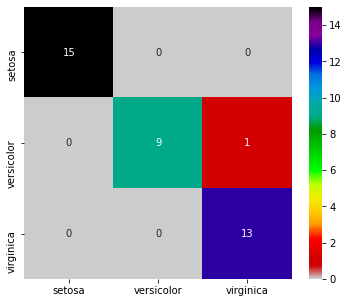

In [74]:
plt.figure(figsize=(6,5))
confusion_df = pd.DataFrame(confusion, index = ['setosa','versicolor','virginica'],columns= ['setosa','versicolor','virginica'])
axes = sns.heatmap(confusion_df, annot= True, cmap='nipy_spectral_r') #cmap 은 color map 을 뜻함
plt.show()

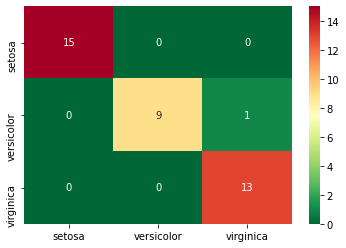

In [75]:
axes = sns.heatmap(confusion_df, annot= True, cmap='RdYlGn_r') #cmap 은 color map 을 뜻함
plt.show()

In [108]:
# K-nearest Neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier

In [109]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train,y_train)
print(classifier.score(x_test, y_test))

0.9736842105263158


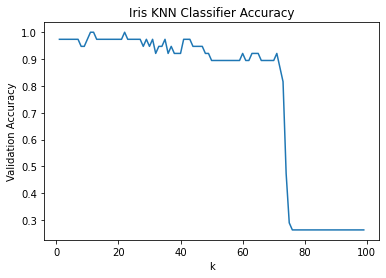

In [123]:
import matplotlib.pyplot as plt
k_list = range(1,100)
accuracies = []
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(x_train,y_train)
    accuracies.append(classifier.score(x_test, y_test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Iris KNN Classifier Accuracy")
plt.show()

In [95]:
# Naive-Bayes Gaussian Kernel
from sklearn.naive_bayes import GaussianNB

In [126]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb.score(x_test, y_test)

0.9473684210526315

In [129]:
gnb_prediction = gnb.predict(x_test)
gnb_score = metrics.accuracy_score(y_test,gnb_prediction)
gnb_score

0.9473684210526315